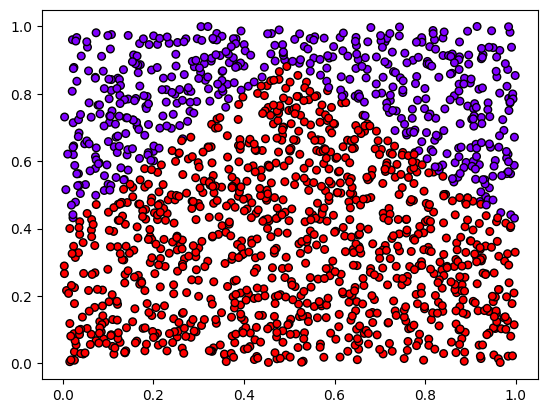

In [ ]:
# Вариант 7
import numpy as np
import matplotlib .pyplot as plt
import torch
X = torch.rand(1500, 2)
Y = ((torch.abs(X[:, 0] - 0.5) + X[:, 1]) < 0.9).float()
Y = Y.view(-1, 1)
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c = Y.numpy()[:, 0],
            s=30, cmap='rainbow', edgecolors='black')


In [ ]:
dataset = torch.utils.data.TensorDataset(X, Y)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [1200, 300])
trainX = train_dataset[:][0]
trainY = train_dataset[:][1]
testX = test_dataset[:][0]
testY = test_dataset[:][1]
print(trainX.shape)
print(testY.shape)
print(trainX.dtype)

torch.Size([1200, 2])
torch.Size([300, 1])
torch.float32


In [ ]:
import torch.nn as nn
class network(nn.Module):
  def __init__(self, n_hidden):
    super(network,self).__init__()
    self.fc1=nn.Linear(2, n_hidden)
    self.fc2=nn.Linear(n_hidden, n_hidden)
    self.fc3=nn.Linear(n_hidden, 1)
    self.act1=nn.ReLU()
    self.act2=nn.ReLU()
    self.sm=nn.Sigmoid()
    #self.loss=nn.CrossEntropyLoss()
    self.loss=nn.BCEWithLogitsLoss()

  def forward(self,x):
    x=self.fc1(x)
    x=self.act1(x)
    x=self.fc2(x)
    x=self.act2(x)
    x=self.fc3(x)
    return x

  def fit(self,trainX,trainY, epochs=100, batch_size=20):
    optimizer = torch.optim.Adam(self.parameters(), lr=1e-2,betas=(0.9, 0.99))#, betas=(0.9, 0.99)
    for epoch in range(epochs):
      idx=np.random.permutation(trainX.shape[0]) #массив индексов зад. длины
      for i in range(0,trainX.shape[0],batch_size):
        optimizer.zero_grad()
        batch_ind=idx[i:i+batch_size]
        x_batch=trainX[batch_ind]
        y_batch=trainY[batch_ind]

        y_pred=self.forward(x_batch)
        loss_val=self.loss(y_pred, y_batch)
        loss_val.backward()
        optimizer.step()

  def predict(self, x):
    x=self.forward(x)
    x=self.sm(x)
    return x

Net=network(10)
Net.fit(trainX,trainY)
n=1
acc=0
for i in range(trainY.shape[0]):
  preds=(Net.predict(trainX[i]).detach().numpy())
  preds=np.where(preds>0.5,1,0)
  acc += (preds==trainY[i].numpy())
print("train accuracy: ",acc/trainY.shape[0])
acc=0
for i in range(testY.shape[0]):
  preds=(Net.predict(testX[i]).detach().numpy())
  preds=np.where(preds>0.5,1,0)
  acc += (preds==testY[i].numpy())
print("test accuracy: ",acc/testY.shape[0])


train accuracy:  [0.9825]
test accuracy:  [0.99]
